### Install OpenCV 4.1.1
`conda install -c conda-forge opencv=4.1.1`

In [1]:
%pylab notebook
import cv2
cv2.__version__

Populating the interactive namespace from numpy and matplotlib


'4.1.0'

In [2]:
imshow, cv2.imshow

(<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, *, data=None, **kwargs)>,
 <function imshow>)

In [3]:
%cd course-repo/data

/home/matheus/Projects/opencv-101/course-repo/data


In [4]:
%ls *.png

aloeGT.png        chessboard.png   imageTextN.png   pic1.png  rubberwhale1.png
basketball1.png   chicky_512.png   imageTextR.png   pic2.png  rubberwhale2.png
basketball2.png   detect_blob.png  mask.png         pic3.png  templ.png
box_in_scene.png  digits.png       messimask.png    pic4.png  tmpl.png
box.png           graf1.png        notes.png        pic5.png
cards.png         graf3.png        opencv-logo.png  pic6.png


<IPython.core.display.Javascript object>


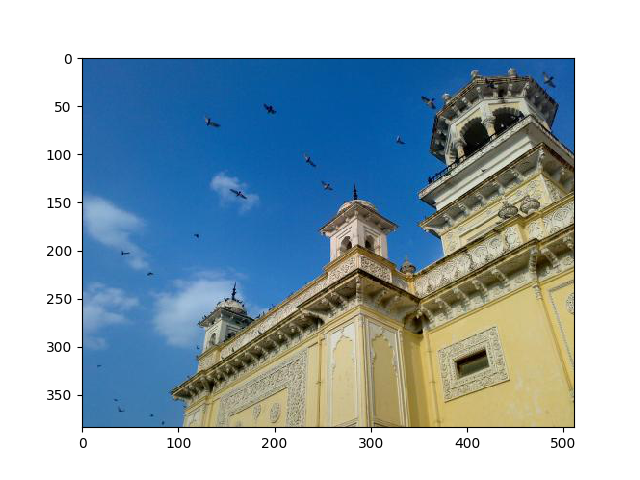

In [5]:
im2disp = imread('home.jpg')
figure()
imshow(im2disp)

### OpenCV way 

In [6]:
cvim2disp = cv2.imread('home.jpg')

cv2.imshow('HelloWorld', cvim2disp)
cv2.waitKey()
cv2.destroyWindow('HelloWorld')

### numpy.imshow for cvim2disp image

<IPython.core.display.Javascript object>


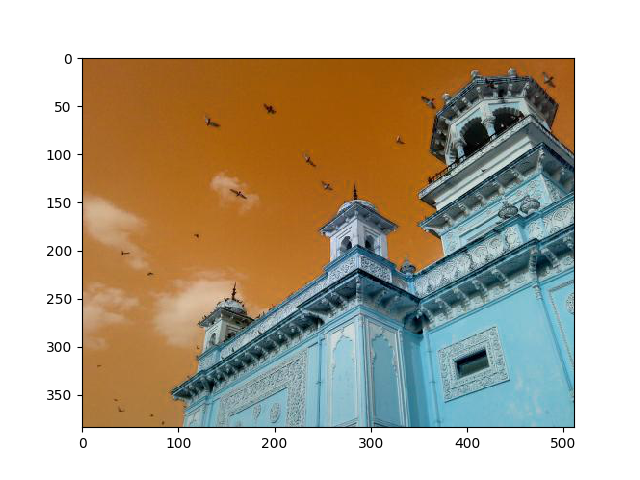

In [7]:
figure()
imshow(cvim2disp)

OpenCV uses BGR color format instead of RGB


That is why `cv2.imshow` is there, so one can easily print BGR images.


Another way of doing that would be to change the color channels position. The `cv.cvtColor(img, cv2.COLOR_BGR2RGB)` is there for it

<IPython.core.display.Javascript object>


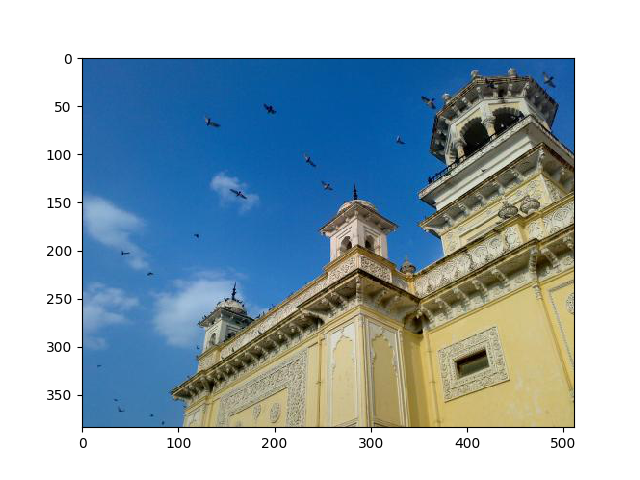

In [8]:
cvimrgb = cv2.cvtColor(cvim2disp, cv2.COLOR_BGR2RGB)

figure()
# Same image as before, but converted to RGB
imshow(cvimrgb)

In [13]:
def mycvshow(imagein, title="Image"):
    cv2.imshow(title, imagein)
    cv2.waitKey()
    cv2.destroyWindow(title)

In [14]:
mycvshow(cvim2disp)

### Simple filtering

<IPython.core.display.Javascript object>


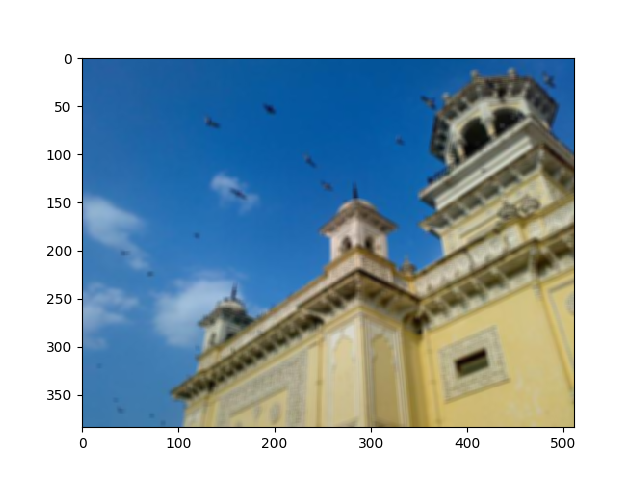

In [17]:
im2disp = imread('home.jpg')
blurred = cv2.GaussianBlur(im2disp, (19,19), 0)

kernel = np.ones((5,5), np.float32)/25
blurred2 = cv2.filter2D(im2disp, -1, kernel)

figure()
imshow(blurred2)

In [18]:
### Saving an image

In [19]:
cv2.imwrite('mycvimage.png', cvim2disp)

# matplotlib
imsave('myimage.png', im2disp)

In [21]:
%ls my*

mycvimage.png  myimage.png


In [24]:
im2disp.dtype, cvim2disp.dtype

(dtype('uint8'), dtype('uint8'))

### `%whos` magic from ipython shows all variables and its formats

In [27]:
x=2
%whos

Variable    Type        Data/Info
---------------------------------
blurred     ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
blurred2    ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
cv2         module      <module 'cv2' from '/home<...>37m-x86_64-linux-gnu.so'>
cvim2disp   ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
cvimrgb     ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
im2disp     ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
kernel      ndarray     5x5: 25 elems, type `float32`, 100 bytes
mycvshow    function    <function mycvshow at 0x7f2e9fa9de18>
x           int         2


### Some demos

In [33]:
# Change to python directory
%cd ../python/

/home/matheus/Projects/opencv-101/course-repo/python


In [36]:
%run inpaint.py


Inpainting sample.

Inpainting repairs damage to images by floodfilling
the damage with surrounding image areas.

Usage:
  inpaint.py [<image>]

Keys:
  SPACE - inpaint
  r     - reset the inpainting mask
  ESC   - exit



In [38]:
%run deconvolution.py


Wiener deconvolution.

Sample shows how DFT can be used to perform Weiner deconvolution [1]
of an image with user-defined point spread function (PSF)

Usage:
  deconvolution.py  [--circle]
      [--angle <degrees>]
      [--d <diameter>]
      [--snr <signal/noise ratio in db>]
      [<input image>]

  Use sliders to adjust PSF paramitiers.
  Keys:
    SPACE - switch btw linear/cirular PSF
    ESC   - exit

Examples:
  deconvolution.py --angle 135 --d 22  ../data/licenseplate_motion.jpg
    (image source: http://www.topazlabs.com/infocus/_images/licenseplate_compare.jpg)

  deconvolution.py --angle 86 --d 31  ../data/text_motion.jpg
  deconvolution.py --circle --d 19  ../data/text_defocus.jpg
    (image source: compact digital photo camera, no artificial distortion)


[1] http://en.wikipedia.org/wiki/Wiener_deconvolution



In [41]:
%run find_obj.py


Feature-based image matching sample.

Note, that you will need the https://github.com/opencv/opencv_contrib repo for SIFT and SURF

USAGE
  find_obj.py [--feature=<sift|surf|orb|akaze|brisk>[-flann]] [ <image1> <image2> ]

  --feature  - Feature to use. Can be sift, surf, orb or brisk. Append '-flann'
               to feature name to use Flann-based matcher instead bruteforce.

  Press left mouse button on a feature point to see its matching point.

using brisk
img1 - 1662 features, img2 - 2786 features
matching...
50 / 52  inliers/matched


In [50]:
%run peopledetect.py


example to detect upright people in images using HOG features

Usage:
    peopledetect.py <image_names>

Press any key to continue, ESC to stop.

